# 课时28 卷积神经网络识别Fashion mnist数据集

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('darkgrid')
import matplotlib.pyplot as plt
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.4.0


# 1. 加载fashion_mnist数据集并进行处理

In [9]:
# 导入数据
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
# 对图片数据进行channel维度的扩充(下面只是其中一种方式，还可以用reshape或者tf的方式)
# axis: Position in the expanded axes where the new axis is placed.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
train_images.shape

(60000, 28, 28, 1)

# 2. 搭建模型

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(3, 3), 
                           input_shape=(train_images.shape[1:]), 
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # 通过使用GlobalAveragePooling2D替换掉传入全连接层，可以有效避免更多的参数
    # https://www.cnblogs.com/hutao722/p/10008581.html
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 528us/sample - loss: 0.3259 - accuracy: 0.8855 - val_loss: 0.3489 - val_accuracy: 0.8809loss: 0 - E
Epoch 2/5
60000/60000 [==============================] - 30s 504us/sample - loss: 0.3118 - accuracy: 0.8899 - val_loss: 0.3450 - val_accuracy: 0.8807
Epoch 3/5
60000/60000 [==============================] - 30s 507us/sample - loss: 0.3009 - accuracy: 0.8950 - val_loss: 0.3594 - val_accuracy: 0.8741
Epoch 4/5
60000/60000 [==============================] - 31s 509us/sample - loss: 0.2900 - accuracy: 0.8971 - val_loss: 0.3714 - val_accuracy: 0.8663
Epoch 5/5
60000/60000 [==============================] - 30s 508us/sample - loss: 0.2827 - accuracy: 0.8996 - val_loss: 0.3305 - val_accuracy: 0.8832


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

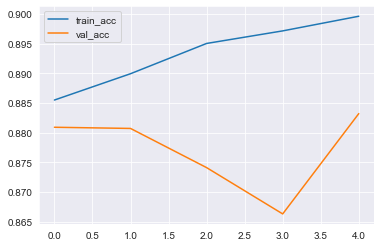

In [26]:
plt.plot(history.epoch, history.history.get('accuracy'), label='train_acc')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_acc')
plt.legend()

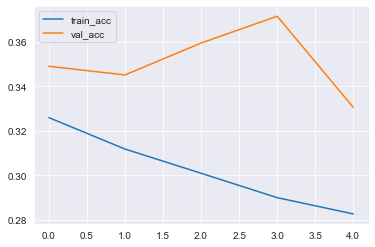

In [27]:
plt.plot(history.epoch, history.history.get('loss'), label='train_acc')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_acc')
plt.legend()

# 3. 增大模型的拟合能力

In [31]:
# 一定要有input_shape
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3, 3), 
                           input_shape=(train_images.shape[1:]), 
                           activation='relu', 
                           padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 256)        